In [1]:
# # # This Python 3 environment comes with many helpful analytics libraries installed
# # # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # # For example, here's several helpful packages to load

# # import numpy as np # linear algebra
# # import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # # Input data files are available in the read-only "../input/" directory
# # # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
        print(os.path.join(dirname, filename))

# # # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pesurrcampusmicompetitionb/sample_submission.csv
/kaggle/input/pesurrcampusmicompetitionb/train.csv
/kaggle/input/pesurrcampusmicompetitionb/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("/kaggle/input/pesurrcampusmicompetitionb/train.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 8991 non-null   object 
 1   length                   8991 non-null   int64  
 2   chroma_stft_mean         8991 non-null   float64
 3   chroma_stft_var          8991 non-null   float64
 4   rms_mean                 8991 non-null   float64
 5   rms_var                  8991 non-null   float64
 6   spectral_centroid_mean   8991 non-null   float64
 7   spectral_centroid_var    8991 non-null   float64
 8   spectral_bandwidth_mean  8991 non-null   float64
 9   spectral_bandwidth_var   8991 non-null   float64
 10  rolloff_mean             8991 non-null   float64
 11  rolloff_var              8991 non-null   float64
 12  zero_crossing_rate_mean  8991 non-null   float64
 13  zero_crossing_rate_var   8991 non-null   float64
 14  harmony_mean            

In [5]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,8991.0,8991.000000,8991.000000,8991.000000,8.991000e+03,8991.000000,8.991000e+03,8991.000000,8.991000e+03,8991.000000,...,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,66149.0,0.379429,0.084906,0.131079,2.692355e-03,2202.499294,4.180213e+05,2243.675807,1.182854e+05,4573.851725,...,1.447258,49.903670,-4.167124,52.012612,0.762790,52.587622,-2.493215,55.144385,-0.909010,57.501708
std,0.0,0.090370,0.009649,0.068530,3.609881e-03,755.453076,4.368142e+05,546.167312,1.015757e+05,1648.815846,...,5.751630,33.659602,5.697644,36.159784,5.191410,38.360354,5.127533,41.979298,5.286712,46.882536
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-24.810783,1.624544,-20.733809,3.437439,-23.676704,3.065302,-35.640659,0.282131
25%,66149.0,0.315718,0.079894,0.083768,6.191782e-04,1630.687076,1.232141e+05,1887.668895,4.872991e+04,3385.889141,...,-2.234193,29.608310,-7.948629,29.862267,-2.445160,29.669745,-5.734310,30.503081,-4.015092,30.086961
50%,66149.0,0.384857,0.085147,0.121635,1.496367e-03,2209.805128,2.666254e+05,2232.301304,8.992711e+04,4636.595553,...,1.488159,41.794029,-4.412789,42.266727,0.768402,41.915512,-2.699601,43.447445,-1.033373,44.516968
75%,66149.0,0.442305,0.091105,0.176834,3.168995e-03,2717.143710,5.636267e+05,2595.771961,1.587088e+05,5604.802903,...,5.142493,59.088749,-0.697015,61.809235,3.902450,62.243496,0.516225,65.669441,2.218058,68.463200
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,434.345642,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [6]:
data.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [7]:
print(data["label"].value_counts())

label
pop          900
jazz         900
blues        900
reggae       900
metal        900
disco        899
rock         898
country      898
hiphop       898
classical    898
Name: count, dtype: int64


(array([900., 900., 899., 898., 900., 900., 900., 898., 898., 898.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

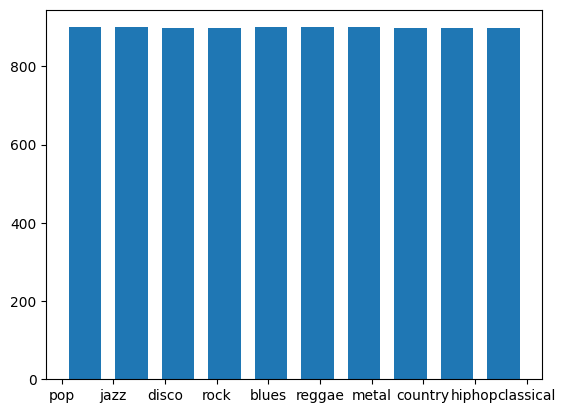

In [8]:
plt.hist(data["label"],rwidth=0.7)

# Data Preprocessing

In [9]:
X = data.iloc[:, 2:-1].values
y = data.iloc[:, -1].values


In [10]:
le = LabelEncoder()
y = le.fit_transform(y)


# Spliting the dataset to train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the ANN Model

In [13]:
model = Sequential()
model.add(Dense(units = 512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16,validation_split = 0.05)

Epoch 1/100
427/427 [==============================] - 3s 4ms/step - loss: 1.8965 - accuracy: 0.3391 - val_loss: 1.3164 - val_accuracy: 0.5306
Epoch 2/100
427/427 [==============================] - 1s 3ms/step - loss: 1.4212 - accuracy: 0.4990 - val_loss: 1.0631 - val_accuracy: 0.6500
Epoch 3/100
427/427 [==============================] - 1s 3ms/step - loss: 1.2378 - accuracy: 0.5783 - val_loss: 0.9411 - val_accuracy: 0.6806
Epoch 4/100
427/427 [==============================] - 1s 3ms/step - loss: 1.0963 - accuracy: 0.6266 - val_loss: 0.8553 - val_accuracy: 0.7000
Epoch 5/100
427/427 [==============================] - 1s 4ms/step - loss: 1.0006 - accuracy: 0.6653 - val_loss: 0.8117 - val_accuracy: 0.7222
Epoch 6/100
427/427 [==============================] - 1s 3ms/step - loss: 0.9500 - accuracy: 0.6907 - val_loss: 0.7454 - val_accuracy: 0.7556
Epoch 7/100
427/427 [==============================] - 1s 3ms/step - loss: 0.8867 - accuracy: 0.7138 - val_loss: 0.7048 - val_accuracy: 0.7861

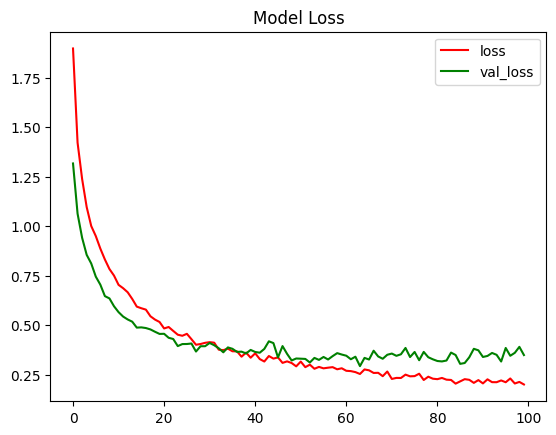

In [16]:
plt.plot(history.history["loss"],color = "red")
plt.plot(history.history["val_loss"],color = "green")
plt.title("Model Loss")
plt.legend(["loss","val_loss"])
plt.show()

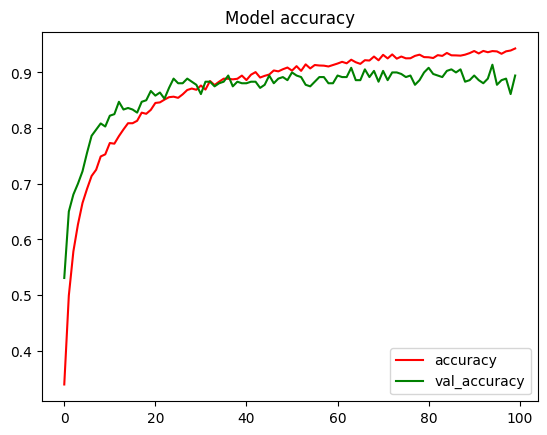

In [17]:
plt.plot(history.history["accuracy"],color = "red")
plt.plot(history.history["val_accuracy"],color = "green")
plt.title("Model accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

# Model Evaluation

In [18]:

y_pred_ann = model.predict(X_test)
y_pred = []

for i in y_pred_ann:
  y_pred.append(np.argmax(i))

accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy: ",accuracy * 100)

57/57 [==============================] - 0s 2ms/step
Test Accuracy:  89.43857698721513


In [19]:
print(y_pred)

[7, 2, 0, 1, 2, 9, 3, 3, 3, 5, 6, 0, 6, 3, 0, 3, 6, 2, 5, 5, 9, 3, 8, 7, 7, 0, 0, 6, 0, 1, 7, 7, 6, 8, 4, 3, 5, 7, 1, 1, 0, 3, 5, 7, 7, 2, 9, 1, 8, 7, 5, 6, 4, 9, 9, 1, 4, 8, 1, 0, 2, 1, 2, 9, 2, 7, 0, 2, 5, 6, 3, 3, 7, 0, 6, 4, 7, 9, 6, 7, 1, 6, 6, 6, 9, 6, 7, 0, 5, 3, 7, 3, 8, 0, 5, 8, 8, 3, 4, 4, 2, 8, 9, 6, 5, 4, 3, 6, 3, 8, 3, 6, 3, 2, 4, 9, 0, 5, 7, 8, 0, 0, 4, 0, 9, 2, 0, 6, 0, 1, 8, 0, 9, 1, 9, 7, 4, 7, 1, 1, 7, 3, 4, 2, 8, 9, 2, 5, 1, 9, 7, 3, 7, 8, 1, 0, 3, 2, 0, 4, 5, 8, 4, 9, 6, 2, 0, 6, 1, 9, 3, 0, 5, 9, 4, 5, 2, 6, 3, 5, 4, 2, 1, 5, 4, 2, 1, 0, 5, 1, 3, 1, 2, 9, 2, 9, 4, 8, 1, 2, 4, 8, 8, 6, 9, 3, 4, 0, 5, 1, 0, 3, 5, 1, 1, 8, 2, 6, 7, 8, 9, 5, 3, 3, 2, 9, 6, 3, 8, 7, 6, 0, 5, 6, 1, 0, 5, 0, 7, 2, 6, 7, 2, 8, 0, 6, 6, 8, 1, 7, 3, 8, 8, 4, 1, 8, 4, 1, 0, 5, 4, 9, 9, 2, 7, 1, 4, 8, 7, 2, 5, 8, 4, 8, 0, 7, 6, 5, 0, 3, 7, 7, 5, 4, 5, 4, 1, 0, 4, 4, 5, 0, 2, 7, 8, 1, 8, 2, 7, 4, 5, 6, 1, 5, 5, 4, 5, 7, 2, 4, 0, 1, 7, 3, 2, 1, 0, 8, 1, 4, 5, 4, 0, 5, 8, 6, 9, 1, 5, 9, 8, 6, 7, 

# Test data


In [20]:

test_data = pd.read_csv("/kaggle/input/pesurrcampusmicompetitionb/test.csv")
test_data.head()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34


In [21]:
X_test=test_data.iloc[:,1:-1].values

In [22]:
X_test = scaler.transform(X_test)
y_pred_test=model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [23]:
y_pred_final = []
for i in y_pred_test:
  y_pred_final.append(np.argmax(i))

In [24]:
print(y_pred_final)

[9, 6, 7, 2, 0, 2, 6, 4, 3, 0, 3, 7, 6, 0, 9, 6, 1, 9, 5, 7, 3, 1, 3, 2, 4, 4, 4, 9, 8, 8, 1, 4, 5, 1, 3, 5, 3, 1, 0, 2, 3, 4, 5, 9, 7, 5, 3, 1, 0, 9, 8, 8, 2, 9, 1, 9, 5, 5, 1, 4, 6, 2, 0, 1, 2, 5, 8, 9, 4, 5, 2, 8, 4, 8, 0, 0, 3, 7, 1, 3, 0, 7, 7, 0, 3, 8, 4, 4, 2, 9, 2, 2, 9, 9, 4, 3, 9, 0, 0, 4, 5, 8, 3, 6, 1, 9, 9, 6, 6, 5, 3, 7, 1, 6, 0, 5, 2, 1, 6, 6, 7, 4, 5, 0, 0, 9, 6, 6, 3, 9, 7, 9, 2, 9, 6, 0, 3, 5, 6, 1, 4, 9, 7, 4, 2, 3, 5, 1, 8, 3, 9, 0, 2, 0, 9, 2, 5, 3, 4, 0, 9, 9, 3, 7, 3, 2, 1, 9, 1, 2, 8, 2, 3, 2, 2, 3, 0, 1, 1, 1, 5, 3, 6, 2, 1, 7, 5, 9, 8, 1, 1, 3, 4, 6, 7, 3, 9, 5, 9, 5, 2, 3, 7, 0, 5, 6, 9, 4, 5, 0, 5, 4, 5, 2, 3, 7, 2, 9, 4, 8, 9, 4, 5, 9, 7, 3, 2, 6, 7, 2, 7, 0, 0, 0, 4, 4, 5, 8, 1, 2, 4, 9, 5, 5, 8, 7, 7, 2, 4, 0, 2, 8, 9, 7, 5, 1, 0, 2, 1, 4, 0, 5, 0, 4, 8, 7, 9, 1, 5, 9, 9, 3, 7, 2, 9, 8, 3, 9, 9, 6, 0, 6, 8, 8, 2, 7, 4, 7, 2, 6, 6, 7, 6, 2, 5, 9, 8, 1, 5, 4, 4, 5, 4, 1, 6, 5, 6, 8, 1, 0, 7, 8, 5, 6, 6, 5, 8, 4, 9, 9, 5, 8, 3, 0, 3, 7, 1, 5, 9, 5, 5, 8, 3, 

In [25]:
#ground_truth=pd.read_csv('ground_truth.csv')

In [26]:
#true_values=ground_truth['label']

In [27]:
#print(accuracy_score(true_values,y_pred_final))

In [28]:
id = test_data["id"]

In [29]:
predictions = y_pred_final

# Submission

In [30]:
submission_df = pd.DataFrame({'id': id,  'label': predictions})

In [31]:
submission_df.to_csv('music_genre_predictions.csv', index=False)

In [32]:
submission_df.head()

,id,label
0,9586,9
1,6984,6
2,7047,7
3,2510,2
4,34,0


# Verification


In [33]:
#sub = pd.read_csv("music_genre_predictions.csv")

In [34]:
#print(accuracy_score(true_values,sub["label"]))